##**Case study on unsupervised learning**
Try out different clustering models in the given dataset - Wine_clust.csv. Find the optimum 
number of clusters in each model and create the model with optimum number of 
clusters. Also learn about dB scan clustering and implement it




### Author : Neethu Raj  on 28-03-2023


### **Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,MeanShift,OPTICS,SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

### **Load and analyze the data**

In [3]:
data=pd.read_csv("/content/Wine_clust.csv")

In [ ]:
df=data.copy()

In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.shape

(178, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### **Pre Process the data**

In [4]:
# Scale the data

scaler=StandardScaler()

features=scaler.fit(data)
features=features.transform(data)

In [ ]:
features

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [5]:
scaled_data=pd.DataFrame(features,columns=data.columns)

In [ ]:
scaled_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [6]:
X=scaled_data.values

In [ ]:
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
X_normalized=normalize(X)

In [8]:
X_normalized=pd.DataFrame(X_normalized)
X_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.195143,0.662421,0.067958,0.067211,-0.074141,-0.219493,-0.317320,0.283785,-0.207148,0.254500,-0.310162,-0.274185,-0.004889
174,0.151189,0.432907,0.127125,0.322553,0.048596,-0.243124,-0.393599,0.168279,-0.097132,0.297199,-0.346151,-0.455228,0.003032
175,0.076851,0.402951,-0.089922,0.035026,0.328507,-0.260934,-0.310533,0.126817,-0.097479,0.513690,-0.372322,-0.343065,0.064799
176,0.054369,0.059166,0.003308,0.039409,0.369612,-0.268602,-0.351997,0.352066,-0.059595,0.476803,-0.407509,-0.363970,0.077045


### K-Mens clustering

##### The elbow Method is used to determine the number of clusters

In [ ]:
wcss={}
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss[i]=kmeans.inertia_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

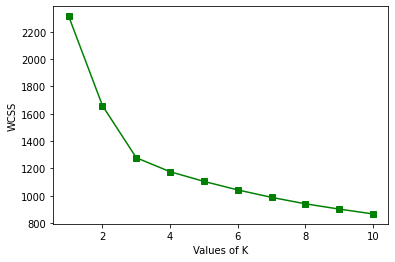

In [ ]:
plt.plot(wcss.keys(),wcss.values(),'gs-')
plt.xlabel("Values of K")
plt.ylabel('WCSS')
plt.show()

In [ ]:
#from the above graph that there is turning like an elbow at k=3. So, we can say that the right number of cluster for the given datasets is 3.

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# For each cluster, there are values of cluster centers according to the number of columns present in the data.
kmeans.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [ ]:
#labels_ Index of the cluster each sample belongs to.
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhoutte_avg=silhouette_score(X,y_kmeans)

In [ ]:
silhoutte_avg

0.2848589191898987

### Dimensionality Reduction Technique PCA- Principal Component Analysis

In [ ]:
pca=PCA(n_components=2)
#Minimize the dataset from 13 features to 2 features using principal component analysis (PCA).
reduced_X=pd.DataFrame(data=pca.fit_transform(X_normalized),columns=['PCA1','PCA2'])

In [ ]:
reduced_X.head()

,PCA1,PCA2
0,-0.832433,-0.318834
1,-0.639443,0.091947
2,-0.756882,-0.243317
3,-0.805447,-0.510057
4,-0.373903,-0.311604


In [ ]:
reduced_X.head()

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [ ]:
# Reducing the cluster centers
centers=pca.transform(kmeans.cluster_centers_)

In [ ]:
centers

array([[-0.03695661,  1.77223945],
       [ 2.2761936 , -0.93205403],
       [-2.72003575, -1.12565126]])

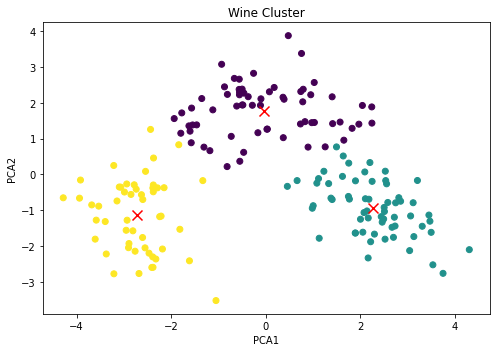

In [ ]:
plt.figure(figsize=(7,5))
 
# Scater plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

### DBSCAN custering

In [ ]:
model=DBSCAN(eps=0.30,min_samples=9)

In [ ]:
y_dbc=model.fit_predict(X)

In [ ]:
# unique clusetrs
clusters=np.unique(y_dbc)

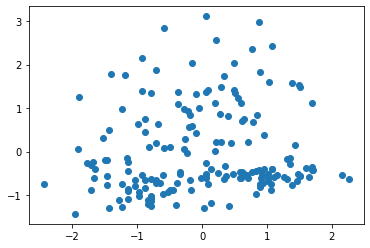

In [ ]:
for cluster in clusters:
  row_ix=np.where(y_dbc==cluster)
  plt.scatter(X[row_ix, 0], X[row_ix, 1])

In [ ]:
silhoutte_avg=silhouette_score(X,y_kmeans)
silhoutte_avg

0.2848589191898987

with the Dimensionally reduced data:

In [ ]:
model_1=DBSCAN(eps=0.30,min_samples=9).fit(reduced_X)

In [ ]:
labels=model_1.labels_

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

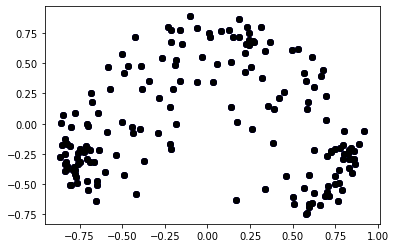

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot

r = plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'], color ='r');
g = plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'], color ='g');
b = plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'], color ='b');
k = plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'], color ='k');

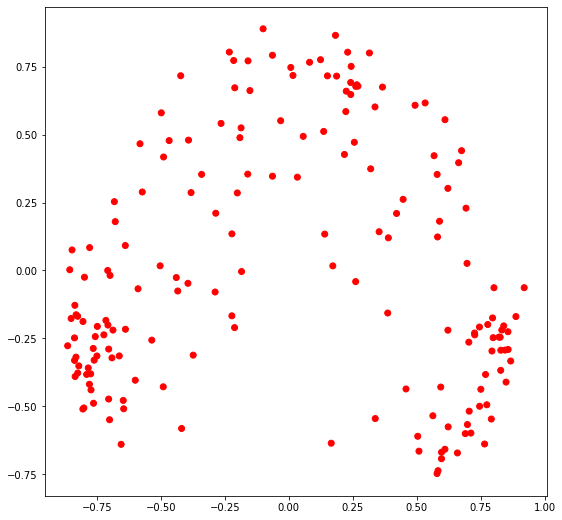

In [ ]:
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'], c = cvec)
plt.show()  

In [ ]:
plt.show()

### Agglomerative Clustering

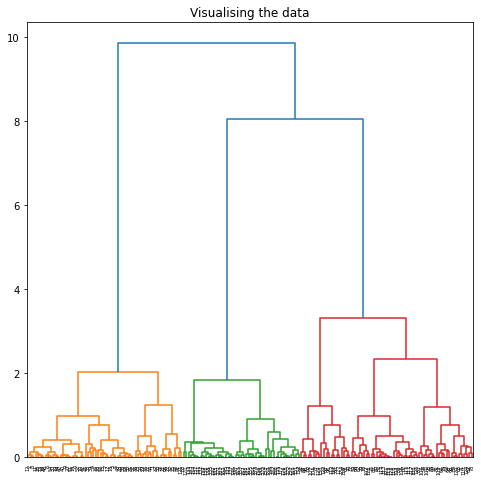

In [ ]:
# Visualizing the working of the Dendrograms 

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(reduced_X, method ='ward')))


In [ ]:
#Building and Visualizing the different clustering models for different values of k a) k = 3

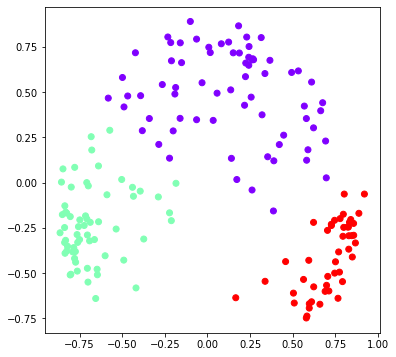

In [ ]:
# k=3
ac2 = AgglomerativeClustering(n_clusters = 3)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'],
           c = ac2.fit_predict(reduced_X), cmap ='rainbow')
plt.show()

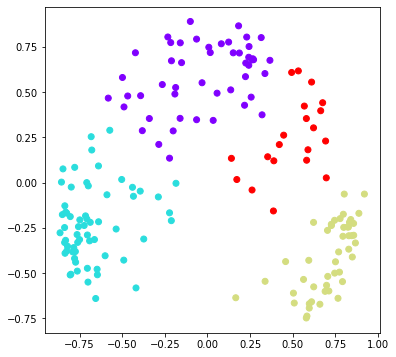

In [ ]:
# k=4
ac4 = AgglomerativeClustering(n_clusters = 4)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'],
           c = ac4.fit_predict(reduced_X), cmap ='rainbow')
plt.show()

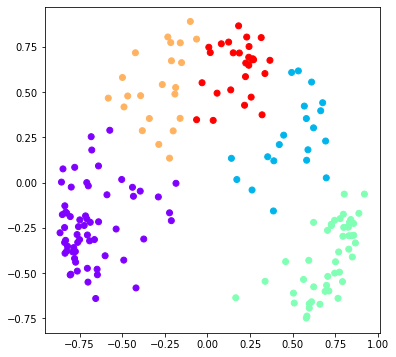

In [ ]:
# k=5
ac5 = AgglomerativeClustering(n_clusters = 5)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'],
           c = ac5.fit_predict(reduced_X), cmap ='rainbow')
plt.show()

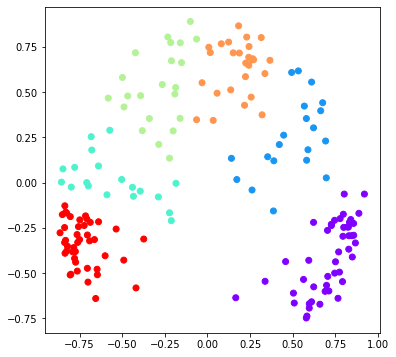

In [ ]:
# k=6
ac6 = AgglomerativeClustering(n_clusters = 6)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'],
           c = ac6.fit_predict(reduced_X), cmap ='rainbow')
plt.show()

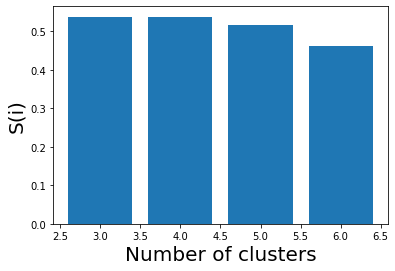

In [ ]:
 # Silhouette Scores for Evaluating the different models and Visualizing the results. 
 k = [ 3, 4, 5, 6]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []

silhouette_scores.append(silhouette_score(reduced_X, ac2.fit_predict(reduced_X)))
silhouette_scores.append(silhouette_score(reduced_X, ac4.fit_predict(reduced_X)))
silhouette_scores.append(silhouette_score(reduced_X, ac5.fit_predict(reduced_X)))
silhouette_scores.append(silhouette_score(reduced_X, ac6.fit_predict(reduced_X)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [ ]:
#hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

In [ ]:
#y_hc=hc.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#clusters=np.unique(y_hc)

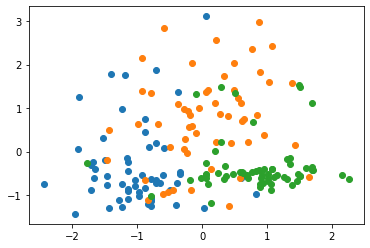

In [ ]:
"""for cluster in clusters:
  row_ix = np.where(y_hc == cluster)
 # create scatter of these samples
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()"""

In [ ]:
#silhoutte_avg=silhouette_score(X,y_hc)
#silhoutte_avg

0.2774439826952265

### MeanShift clusterig

In [ ]:
ms=MeanShift()

In [ ]:
ms.fit(X)

MeanShift()

In [ ]:
# store the coordinates for the cluster centers

cluster_centers =ms.cluster_centers_

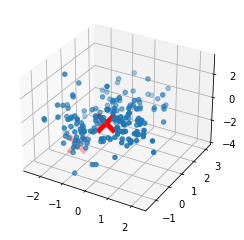

In [ ]:
# Plot the data points

fig=plt.figure()

ax=fig.add_subplot(111,projection ='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],marker='o')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           cluster_centers[:, 2], marker ='x', color ='red',
           s = 300, linewidth = 5, zorder = 10)
 
plt.show()